# 분류 성능 평가
분류 문제는 회귀 분석과 달리 다양한 성능 평가 기준이 필요
- why? 분류의 **최종 목적**이 다르다.

# Confusion Matrix 분류 결과표 
실제 클래스(row)와 예측 클래스(column)가 일치하는지 갯수로 센 결과


`confusion_matrix()`

대각행렬꼴이 되는 것이 ideal하다

In [1]:
from sklearn.metrics import confusion_matrix

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [2]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

# Binary Confusion Matrix 이진 분류 결과표 
클래스가 0과 1 두 종류인 경우에는 일반적으로 "Positive"와 "Negative"로 표시

|      |positive 라고 예측| Negative 라고 예측|
| -- :| | |
|실제 Positive| True Positive | False Negative|
|실제 Negative| False Positive| True Negative|


### FDS(Fraud Detection System)의 예
잘못된 거래, 사기 거래를 찾아내는 시스템

|      |사기 거래라고 예측| 정상 거래라고 예측|
| -- :| | |
|실제 사기 거래| True Positive | False Negative|
|실제 정상 거래| False Positive| True Negative|

# 평가 스코어

## Accuracy 정확도
- 모형 트레이닝 즉, 최적화에서 목적함수로 사용
$$\text{accuracy} = \dfrac{TP + TN}{TP + TN + FP + FN}$$

## Precision 정밀도
- 클래스에 속한다고 예측한 샘플이 정답인 비율
- FDS의 경우, 사기라고 예측한 거래중 실제 사기 거래의 비율. 유죄율

$$\text{precision} = \dfrac{TP}{TP + FP}$$

- precision을 높이는 방법
    
    될만한 애들만 고른다.
    
    ex) 기소 성공율 99.9%  Why? 억울한 사람이 없도록 하는 법 철학


## Recall 재현율
TPR(True Positive rate), sensitivity
- 실제 클래스에 속한 샘풀 중에 클래스에 속한다고 예측한 샘플의 수
- FDS의 경우, 실제 사기거래 중 사기 거래라고 예측한 거래의 비율. 검거율

$$\text{recall} = \dfrac{TP}{TP + FN}$$

## Fall-Out 위양성율
억울한 애들, FPR(False Positice rate), specificity(특이도) = 1 - fall-out
- 실제 클래스에 속하지 않는 샘플 중 클래스에 속한다고 예측한 샘플 수
- FDS의 경우, 정상 거래 중 사기 거래라고 예측한 거래의 비율. 원죄율

$$\text{fallout} = \dfrac{FP}{FP + TN}$$ 

### 스코어간 관계
Precision과 Fall-out, Recall은 대체적으로 역의 관계를 지닌다.
- Fall-out, Recall은 서로 정의 관계. (나쁜 놈 많이 잡다보면 억울한 애도 늘어남)

## F(beta) score
Precision(정밀도)과 Recall(재현율)의 가중 조화 평균 (역의 관계일때는 조화평균이 잘 표현한다.)

$$F_\beta = (1 + \beta^2) \, ({\text{precision} \times \text{recall}}) \, / \, ({\beta^2 \, \text{precision} + \text{recall}})$$

- F1 score
    - beta = 1
$$F_1 = 2 \cdot \text{precision} \cdot \text{recall} \, / \, (\text{precision} + \text{recall})$$

`classfication_report()` precision, recall, f1-score 함께 표현

In [3]:
from sklearn.metrics import *
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.50      1.00      0.67         1
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.67      0.80         3

avg / total       0.70      0.60      0.61         5



support : 실제 갯수

# ROC 커브
Receiver Operator Charateristic Curve는 
>클래스 판별 기준값(threshold)의 변화에 따른 

>**Fall-out과 Recall의 변화**를 시각화한 것

일반적으로 클래스 판별 기준이 변화함에 따라 Recall과 Fall-out은 같이 증가하거나 감소한다. 
- Fall-out보다 Recall이 더 빠르게 증가하는 모형은 좋은 모형으로 생각할 수 있다.

In [4]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, weights=[0.9, 0.1], random_state=1)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0026, C=10).fit(X, y)
y_hat2 = model2.predict(X)

In [6]:
print(confusion_matrix(y, y_hat1), "\n")
print(confusion_matrix(y, y_hat2))

[[8853   94]
 [ 397  656]] 

[[8894   53]
 [ 397  656]]


#### precision, recall, f1-score 결과는 큰 차이가 없다.

In [7]:
print(classification_report(y, model1.predict(X)))
print(classification_report(y, model2.predict(X)))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      8947
          1       0.87      0.62      0.73      1053

avg / total       0.95      0.95      0.95     10000

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      8947
          1       0.93      0.62      0.74      1053

avg / total       0.95      0.95      0.95     10000



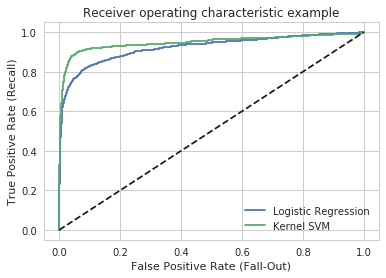

In [8]:
from sklearn.metrics import roc_curve
%matplotlib inline

fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

#### 그러나 ROC 커브로 보면 성능 차이가 보인다.

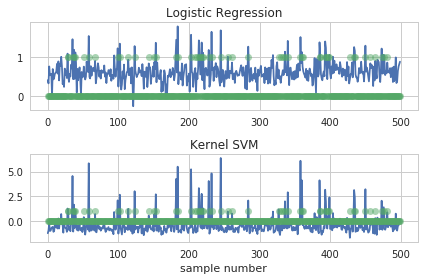

In [9]:
N = 500

plt.subplot(211)
plt.plot(model1.decision_function(X[:N]) * 0.1 + 1) # 시각화를 위해 조정한 부분
plt.plot(y[:N], 'o', alpha=0.5)
plt.title("Logistic Regression")

plt.subplot(212)
plt.plot(model2.decision_function(X[:N]) + 1) #
plt.plot(y[:N], 'o', alpha=0.5)
plt.title("Kernel SVM")
plt.xlabel("sample number")

plt.tight_layout()
plt.show()

# AUC
Area Under the Curve

ROC curve의 면적을 뜻한다. 클수록 좋다.

In [10]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9227893798140808, 0.9486326091892203)